In [1]:
%matplotlib inline
import os
import h5py
import numpy as np
import pandas as pd
import csv
import re
from matplotlib import pyplot as plt
import seaborn as sns
from io import StringIO
sns.set(font_scale=1.9, style="white")

# Import data

This is all for the MISL tag.

## Dehydrated & sequenced immediately

In [2]:
seq_summary_short = "/path/to/data/MinION_sequencing_data_20191216/guppy_3.2.2_12_16_19_run_01_exec_20200107/sequencing_summary.txt"

In [3]:
f5_meta_short = pd.read_csv(seq_summary_short, header=0, sep="\t")

## Fresh

In [7]:
seq_summary_fresh = "/path/to/data/MinION_sequencing_data_20191011/guppy_3.2.2_10_11_19_run_02_exec_20191014/sequencing_summary.txt"

In [8]:
f5_meta_fresh = pd.read_csv(seq_summary_fresh, header=0, sep="\t")

## Dehydrated & sequenced after 4 weeks

In [9]:
seq_summary_long = "/path/to/data/MinION_sequencing_data_20200121/guppy_3.2.2_01_21_20_run_01_exec_20200121/sequencing_summary.txt"

In [10]:
f5_meta_long = pd.read_csv(seq_summary_long, header=0, sep="\t")

## Summarize data

In [12]:
data = {
    "short": {"plot_label": "Dehydrated tag (0 days)",
              "color": "tab:green",
              "offset": 250,
              "metadata": f5_meta_short},
    "long": {"plot_label": "Dehydrated tag (4 weeks)",
              "color": "tab:blue",
              "offset": 0,
              "metadata": f5_meta_long},
    "fresh": {"plot_label": "Fresh tag",
              "color": "tab:orange",
              "offset": 0,
              "metadata": f5_meta_fresh},
}

# Compare quality overall

In [13]:
f5_meta_long.columns

Index(['filename', 'read_id', 'run_id', 'batch_id', 'channel', 'mux',
       'start_time', 'duration', 'num_events', 'passes_filtering',
       'template_start', 'num_events_template', 'template_duration',
       'sequence_length_template', 'mean_qscore_template',
       'strand_score_template', 'median_template', 'mad_template'],
      dtype='object')

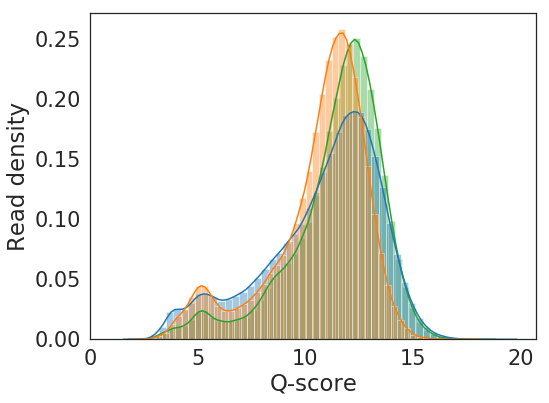

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

for d in data.values():
    meta = d.get("metadata")
    sns.distplot(meta["mean_qscore_template"], color=d.get("color"), label=d.get("plot_label"))
    
ax.set_xlabel("Q-score")
ax.set_ylabel("Read density")
ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
# ax.legend()
fig.savefig("../plots/dehydrated_comparisons/quality.svg")
fig.savefig("../plots/dehydrated_comparisons/quality.png", dpi=300)

# Compare read lengths

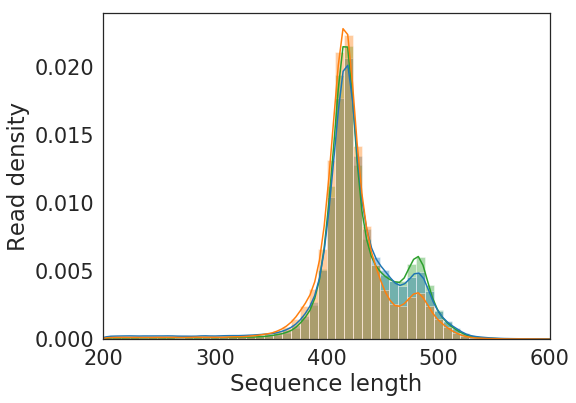

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))

max_len = 600
min_len = 200

for d in data.values():
    meta = d.get("metadata")
    l = [x for x in meta["sequence_length_template"] if x <= max_len and x >= min_len]
    sns.distplot(l, color=d.get("color"), label=d.get("plot_label"))
    
ax.set_xlabel("Sequence length")
ax.set_ylabel("Read density")
ax.set_xlim([200, 600])#ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
# ax.legend()
fig.savefig("../plots/dehydrated_comparisons/seq_len.svg")
fig.savefig("../plots/dehydrated_comparisons/seq_len.png", dpi=300)